# comparing tmglut with glutamate

In [1]:
%matplotlib inline

from    neuron  import          h
import  numpy                as np
import  matplotlib.pyplot    as plt
import  matplotlib.image     as mpimg
import  json

from mpl_toolkits.axes_grid.inset_locator import inset_axes

# Load model mechanisms
import neuron               as nrn
nrn.load_mechanisms('Mech/')

h.load_file('stdlib.hoc')
h.load_file('import3d.hoc')

1.0

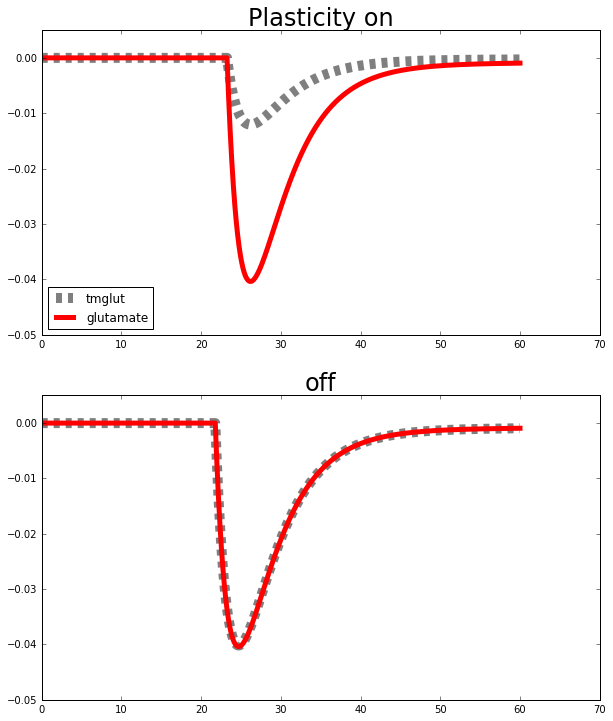

In [9]:
# simulation length
tstop = 60

# create cell
dend = h.Section(name='dend')    



tmglut = h.tmGlut(0.5, sec=dend)
tmglut.nmda_ratio = 1
tmglut.q = 1
tmglut.tau1_ampa= 1.9
tmglut.tau2_ampa = 4.8
tmglut.tau1_nmda= 6
tmglut.tau2_nmda = 116



glutamate = h.glutamate(0.5, sec=dend)
glutamate.ratio = 1.0
glutamate.q = 1
glutamate.tau1_ampa= 1.9
glutamate.tau2_ampa = 4.8
glutamate.tau1_nmda= 6
glutamate.tau2_nmda = 116



ns = h.NetStim()
ns.start = 20
ns.noise = 1
ns.number = 1


nc1 = h.NetCon(ns, tmglut)
nc1.weight[0] = 0.5e-3
nc1.delay = 0

s1 = h.Vector()
s1.record(tmglut._ref_i)

nc2 = h.NetCon(ns, glutamate)
nc2.weight[0] = 0.5e-3
nc2.delay = 0

s2 = h.Vector()
s2.record(glutamate._ref_i)


tm = h.Vector()
tm.record(h._ref_t)

vm = h.Vector()
vm.record(dend(0.5)._ref_v)



h.finitialize(-80)
while h.t < tstop:
    h.fadvance()

f,a = plt.subplots(2,1, figsize=(10,12))
a[0].plot(tm, s1,'--k', lw=10, alpha=0.5)
a[0].plot(tm, s2, 'r', lw=5)
a[0].set_ylim([-0.05, 0.005])
a[0].set_title('Plasticity on', fontsize=24)
a[0].legend(['tmglut', 'glutamate'], loc='best')

# without plasticity in tmglut
tmglut.plasticity = 0

h.finitialize(-80)
while h.t < tstop:
    h.fadvance()

a[1].plot(tm, s1,'--k', lw=10, alpha=0.5)
a[1].plot(tm, s2, 'r', lw=5)
a[1].set_ylim([-0.05, 0.005])
a[1].set_title('off', fontsize=24)

f.savefig('../../../Desktop/comparing_synaptic_mech_current.png')